In [2]:
import sklearn.datasets as dataset
from sklearn.decomposition import PCA
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.manifold import TSNE
from umap import UMAP

In [3]:
iris = dataset.load_breast_cancer()
X = iris.data
Y = iris.target
print(Y)
print(X)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

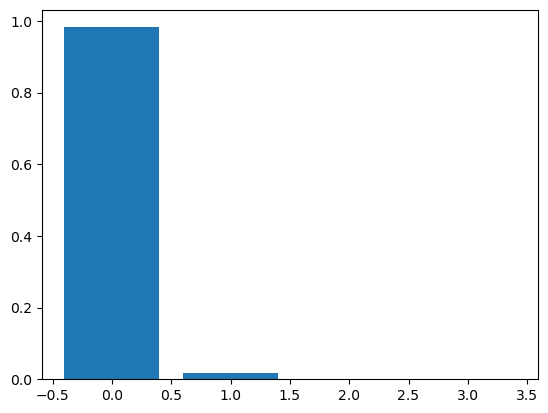

In [5]:
pca = PCA(n_components=4)
new_X = pca.fit(X)
fig = plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.show()
pca2D = PCA(n_components=2)
proj2D = pca.fit_transform(X)
pca3D = PCA(n_components=3)
proj3D = pca.fit_transform(X)
fig_2d = px.scatter(
    proj2D, x=0, y=1,
    color=Y, labels={'color': 'species'}, 
    title = "PCA 2D"
    
)
fig_3d = px.scatter_3d(
    proj3D, x=0, y=1, z=2,
    color=Y, labels={'color': 'species'},
    title = "PCA 3D"
)
fig_3d.update_traces(marker_size=5)

fig_2d.show()
fig_3d.show()

In [7]:
proj2D = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=50).fit_transform(X)
proj3D = TSNE(n_components=3, learning_rate='auto',init='random', perplexity=50).fit_transform(X)
fig_2d = px.scatter(
    proj2D, x=0, y=1,
    color=Y, labels={'color': 'species'},
    title = "T-SNE 2D"
)
fig_3d = px.scatter_3d(
    proj3D, x=0, y=1, z=2,
    color=Y, labels={'color': 'species'},
    title = "T-SNE 3D"
)
fig_3d.update_traces(marker_size=5)

fig_2d.show()
fig_3d.show()

In [15]:
umap_2d = UMAP(n_components=2, n_neighbors=100, min_dist=0.1, metric='euclidean')
umap_3d = UMAP(n_components=3, n_neighbors=100, min_dist=0.1, metric='euclidean')


proj_2d = umap_2d.fit_transform(X)
proj_3d = umap_3d.fit_transform(X)
fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=Y, labels={'color': 'species'},
    title = "UMAP 3D"
)
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=Y, labels={'color': 'species'},
    title = "UMAP 3D"
)
fig_3d.update_traces(marker_size=5)

fig_2d.show()
fig_3d.show()